# SDG1: Global Poverty Prediction and Inequality Mapping

This notebook explores poverty trends using World Bank data, clusters countries by socioeconomic factors, and forecasts future rates.

**Plain-language**: We're looking at how poverty changes over time and grouping countries to find patterns.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (update 'your_file.csv' to the actual filename in data/raw_data/)
data_path = 'C:/Users/Administrator/xxxxxx/Documents/sdg-portfolio/SDG1-Global-Poverty-Prediction-and-Inequality-Mapping/data/raw_data/API_SI.POV.DDAY_DS2_en_csv_v2_38376.csv'  # Your filename
df = pd.read_csv(data_path, skiprows=4)

# Clean data
df = df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
             var_name='Year', value_name='Poverty Rate')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.dropna(subset=['Poverty Rate', 'Year'])
print(df.head())  # Show first few rows

# Plain-language: 'This table shows poverty rates for countries over different years.'

       Country Name Country Code  \
1049  United States          USA   
1315  United States          USA   
1581  United States          USA   
1847  United States          USA   
2113  United States          USA   

                                         Indicator Name Indicator Code  \
1049  Poverty headcount ratio at $3.00 a day (2021 P...    SI.POV.DDAY   
1315  Poverty headcount ratio at $3.00 a day (2021 P...    SI.POV.DDAY   
1581  Poverty headcount ratio at $3.00 a day (2021 P...    SI.POV.DDAY   
1847  Poverty headcount ratio at $3.00 a day (2021 P...    SI.POV.DDAY   
2113  Poverty headcount ratio at $3.00 a day (2021 P...    SI.POV.DDAY   

        Year  Poverty Rate  
1049  1963.0           1.5  
1315  1964.0           1.5  
1581  1965.0           1.2  
1847  1966.0           1.2  
2113  1967.0           1.0  


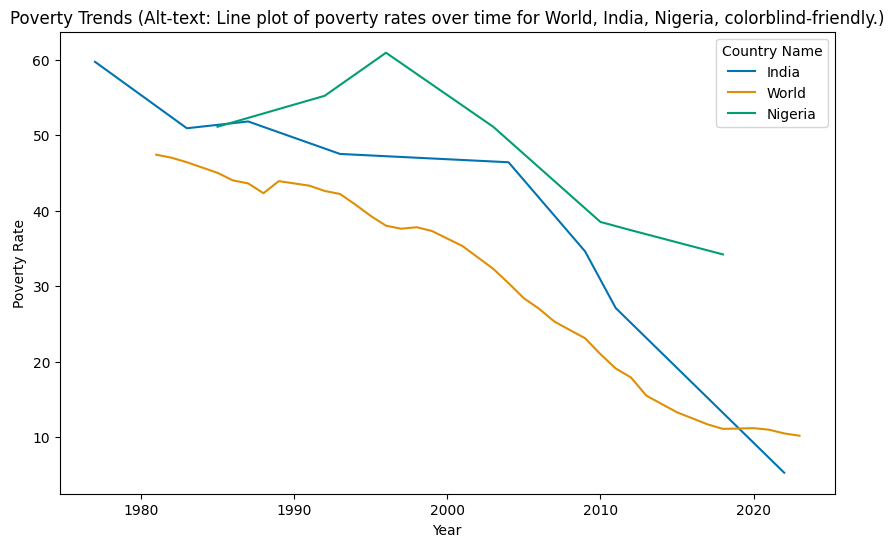

In [2]:
# Visualize trends (accessible)
sns.set_palette('colorblind')
plt.figure(figsize=(10,6))
sns.lineplot(data=df[df['Country Name'].isin(['World', 'India', 'Nigeria'])], 
             x='Year', y='Poverty Rate', hue='Country Name')
plt.title('Poverty Trends (Alt-text: Line plot of poverty rates over time for World, India, Nigeria, colorblind-friendly.)')
plt.savefig('../results/poverty_trends.png')
plt.show()

# Ethics: 'Data may miss informal economies; we use diverse countries to reduce bias.'

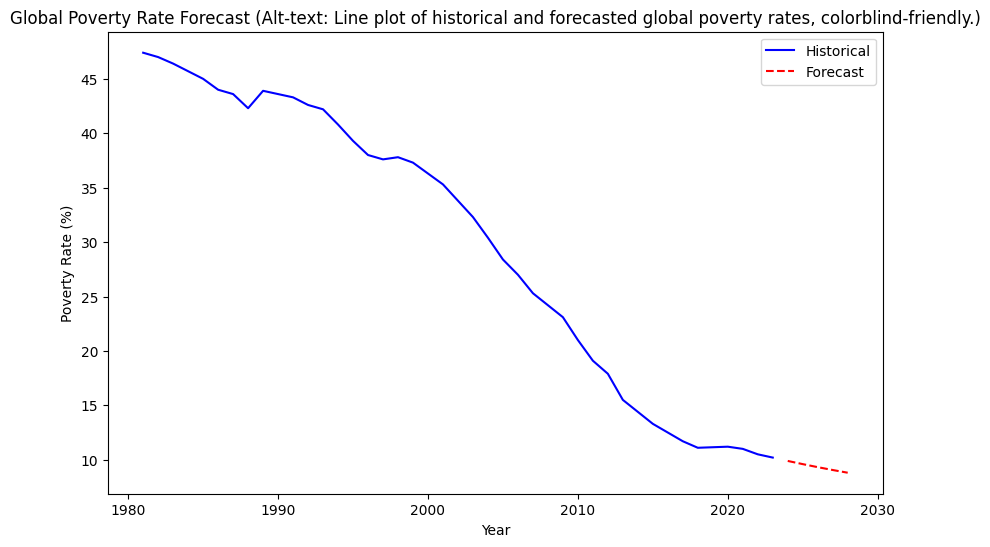

Forecasted Poverty Rates:
    Year  Forecasted Poverty Rate
42  2024                 9.890820
43  2025                 9.597886
44  2026                 9.320346
45  2027                 9.057390
46  2028                 8.808252


In [3]:
# ARIMA forecasting for global poverty rate
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")  # Suppress convergence warnings for simplicity

# Filter for global data
global_df = df[df['Country Name'] == 'World'][['Year', 'Poverty Rate']].set_index('Year')
global_df = global_df.dropna()

# Fit ARIMA model (order=(1,1,1) for simplicity; can tune later)
model = ARIMA(global_df['Poverty Rate'], order=(1,1,1))
model_fit = model.fit()

# Forecast next 5 years
forecast = model_fit.forecast(steps=5)
forecast_years = range(int(global_df.index.max()) + 1, int(global_df.index.max()) + 6)
forecast_df = pd.DataFrame({'Year': forecast_years, 'Forecasted Poverty Rate': forecast})

# Plot actual and forecast
plt.figure(figsize=(10,6))
plt.plot(global_df.index, global_df['Poverty Rate'], label='Historical', color='blue')
plt.plot(forecast_df['Year'], forecast_df['Forecasted Poverty Rate'], label='Forecast', color='red', linestyle='--')
plt.title('Global Poverty Rate Forecast (Alt-text: Line plot of historical and forecasted global poverty rates, colorblind-friendly.)')
plt.xlabel('Year')
plt.ylabel('Poverty Rate (%)')
plt.legend()
plt.savefig('../results/poverty_forecast.png')
plt.show()

print("Forecasted Poverty Rates:")
print(forecast_df)

# Plain-language: 'This predicts future global poverty rates based on past trends.'